# Описание

Craigslist является крупнейшей в мире коллекцией подержанных автомобилей для продажи, но очень трудно собрать их все в одном месте. Я построил скребок для школьного проекта и расширил его позже, чтобы создать этот набор данных, который включает в себя каждую запись подержанного автомобиля в Соединенных Штатах на Craigslist

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [6]:
vehicles = pd.read_csv('../input/craigslist-carstrucks-data/vehicles.csv')

Посмотрим размер таблицы:

In [7]:
vehicles.shape

(426880, 26)

Количество строк (каждая строка соответствует одному автомобилю) 426880, и количество столбцов (каждый столбец соответствует конкретному признаку) 26.

У каждого автомобиля есть ряд признаков: марка, модель, id, цена, год, количество цилиндров и т.д.

Посмотрим теперь на таблицу (для наглядности представлия данных).

In [8]:
vehicles

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


Таким образом, объем данных N = 426880, признаков d = 26.

Теперь рассморим все колонки = признаки.

In [9]:
vehicles.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

Всего имеется 26 признаков:

- ID - идентификатор автомобиля в данных ;
- URL - ссылка на объявление;
- Region - регион в котором продается автомобиль;
- Region_URL - ссылка на сайт региона;
- Price - Цена;
- Year - год;
- Manufacturer - марка автомобиля;
- Model - модель;
- Condition - состояние;
- Cylinders - количество цилиндров двигателя;
- Fuel - вид топлива;
- Odometer - показание одометра;
- Title_Status - Тип сертификата;
- Transmission - Вид трансмиссии;
- VIN - индивидуальный номер автомобиля;
- Drive - тип привода;
- Size - размер;
- Type - тип кузова;
- Paint_Color - цвет;
- Image_URL - ссылка на фотографию;
- Description - описание;
- County - округ;
- State - штат;
- Lat - координата широты;
- Long - координата долготы;
- Posting_Date - дата публикации;


Выведем тип данных всех столбцов, представлных в таблице:

In [10]:
vehicles.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

## Обработка пропущенных значений

Разделим данные на категориальные и количественные

In [11]:
categorical_columns = [c for c in vehicles.columns if vehicles[c].dtype.name == 'object']
numerical_columns   = [c for c in vehicles.columns if vehicles[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['url', 'region', 'region_url', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'image_url', 'description', 'state', 'posting_date']
['id', 'price', 'year', 'odometer', 'county', 'lat', 'long']


Исследуем данные на наличие или отсутствие пропущенных значений

In [12]:
vehicles[categorical_columns].count(axis = 0)

url             426880
region          426880
region_url      426880
manufacturer    409234
model           421603
condition       252776
cylinders       249202
fuel            423867
title_status    418638
transmission    424324
VIN             265838
drive           296313
size            120519
type            334022
paint_color     296677
image_url       426812
description     426810
state           426880
posting_date    426812
dtype: int64

Большинство признаков в которых пропущены значения имеют индивидуальный характер (как говорится, на вкус и цвет товарища нет). Признак 
'title_status' самый важный при покупке автомобиля, но для заполнения этого признака необходимы точные данные. Столбцы 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type' и 'paint_color' содержат категориальные признаки. Необходимо заменить их тип 'Object' на специальный, предназначенный для хранения категориальных значений 

In [17]:
vehicles['condition'] = vehicles['condition'].astype('category')
vehicles['condition'].dtype

CategoricalDtype(categories=['excellent', 'fair', 'good', 'like new', 'new', 'salvage'], ordered=False)

In [18]:
vehicles['cylinders'] = vehicles['cylinders'].astype('category')
vehicles['cylinders'].dtype

CategoricalDtype(categories=['10 cylinders', '12 cylinders', '3 cylinders', '4 cylinders',
                  '5 cylinders', '6 cylinders', '8 cylinders', 'other'],
, ordered=False)

In [19]:
vehicles['fuel'] = vehicles['fuel'].astype('category')
vehicles['fuel'].dtype

CategoricalDtype(categories=['diesel', 'electric', 'gas', 'hybrid', 'other'], ordered=False)

In [20]:
vehicles['title_status'] = vehicles['title_status'].astype('category')
vehicles['title_status'].dtype

CategoricalDtype(categories=['clean', 'lien', 'missing', 'parts only', 'rebuilt',
                  'salvage'],
, ordered=False)

In [21]:
vehicles['transmission'] = vehicles['transmission'].astype('category')
vehicles['transmission'].dtype

CategoricalDtype(categories=['automatic', 'manual', 'other'], ordered=False)

In [22]:
vehicles['drive'] = vehicles['drive'].astype('category')
vehicles['drive'].dtype

CategoricalDtype(categories=['4wd', 'fwd', 'rwd'], ordered=False)

In [23]:
vehicles['size'] = vehicles['size'].astype('category')
vehicles['size'].dtype

CategoricalDtype(categories=['compact', 'full-size', 'mid-size', 'sub-compact'], ordered=False)

In [24]:
vehicles['type'] = vehicles['type'].astype('category')
vehicles['type'].dtype

CategoricalDtype(categories=['SUV', 'bus', 'convertible', 'coupe', 'hatchback',
                  'mini-van', 'offroad', 'other', 'pickup', 'sedan', 'truck',
                  'van', 'wagon'],
, ordered=False)

In [25]:
vehicles['paint_color'] = vehicles['paint_color'].astype('category')
vehicles['paint_color'].dtype

CategoricalDtype(categories=['black', 'blue', 'brown', 'custom', 'green', 'grey',
                  'orange', 'purple', 'red', 'silver', 'white', 'yellow'],
, ordered=False)

In [136]:
vehicles['manufacturer'] = vehicles['manufacturer'].astype('category')
vehicles['manufacturer'].dtype

CategoricalDtype(categories=['acura', 'alfa-romeo', 'aston-martin', 'audi', 'bmw',
                  'buick', 'cadillac', 'chevrolet', 'chrysler', 'datsun',
                  'dodge', 'ferrari', 'fiat', 'ford', 'gmc', 'harley-davidson',
                  'honda', 'hyundai', 'infiniti', 'jaguar', 'jeep', 'kia',
                  'land rover', 'lexus', 'lincoln', 'mazda', 'mercedes-benz',
                  'mercury', 'mini', 'mitsubishi', 'morgan', 'nissan',
                  'pontiac', 'porsche', 'ram', 'rover', 'saturn', 'subaru',
                  'tesla', 'toyota', 'volkswagen', 'volvo'],
, ordered=False)

Признак "county" незначителен так как есть название штата и координаты.

## Обновление данных

Оставим необходимые признаки для оценки.

In [26]:
data = vehicles[['id', 'manufacturer', 'model', 'condition', 'title_status', 'type', 'year', 'odometer', 'price']]
print(data)

                id manufacturer                     model condition  \
0       7222695916          NaN                       NaN       NaN   
1       7218891961          NaN                       NaN       NaN   
2       7221797935          NaN                       NaN       NaN   
3       7222270760          NaN                       NaN       NaN   
4       7210384030          NaN                       NaN       NaN   
...            ...          ...                       ...       ...   
426875  7301591192       nissan         maxima s sedan 4d      good   
426876  7301591187        volvo  s60 t5 momentum sedan 4d      good   
426877  7301591147     cadillac          xt4 sport suv 4d      good   
426878  7301591140        lexus           es 350 sedan 4d      good   
426879  7301591129          bmw  4 series 430i gran coupe      good   

       title_status       type    year  odometer  price  
0               NaN        NaN     NaN       NaN   6000  
1               NaN        NaN 

## Визуализация и описательная статистика

Сводная информация для количественных признаков

In [27]:
data.describe()

,id,year,odometer,price
count,4.268800e+05,425675.000000,4.224800e+05,4.268800e+05
mean,7.311487e+09,2011.235191,9.804333e+04,7.519903e+04
std,4.473170e+06,9.452120,2.138815e+05,1.218228e+07
min,7.207408e+09,1900.000000,0.000000e+00,0.000000e+00
25%,7.308143e+09,2008.000000,3.770400e+04,5.900000e+03
50%,7.312621e+09,2013.000000,8.554800e+04,1.395000e+04
75%,7.315254e+09,2017.000000,1.335425e+05,2.648575e+04
max,7.317101e+09,2022.000000,1.000000e+07,3.736929e+09


Сводная информация для категориальных признаков

In [30]:
data.describe(include = ['category'])

,condition,title_status,type
count,252776,418638,334022
unique,6,6,13
top,good,clean,sedan
freq,121456,405117,87056


Построим диаграмму рассеивания для всех признаков

Text(0, 0.5, 'price')

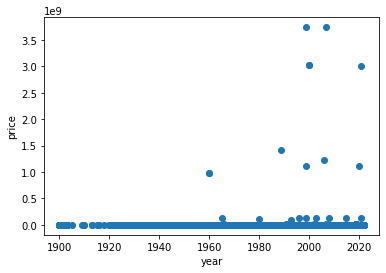

In [43]:
plt.scatter(data['year'], data['price'])
plt.xlabel('year')
plt.ylabel('price')

Text(0, 0.5, 'odometer')

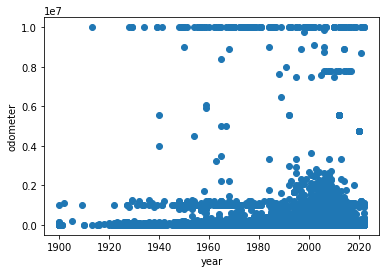

In [42]:
plt.scatter(data['year'], data['odometer'])
plt.xlabel('year')
plt.ylabel('odometer')

Text(0, 0.5, 'title_status')

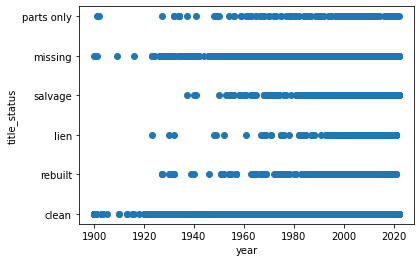

In [58]:
plt.scatter(data['year'], data['title_status'])
plt.xlabel('year')
plt.ylabel('title_status')

Text(0, 0.5, 'condition')

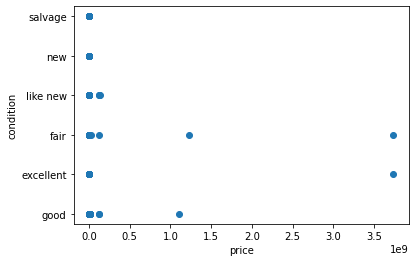

In [85]:
plt.scatter(data['price'], data['condition'])
plt.xlabel('price')
plt.ylabel('condition')

Text(0, 0.5, 'type')

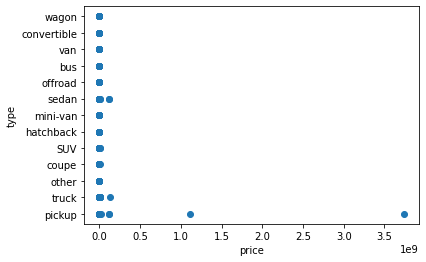

In [87]:
plt.scatter(data['price'], data['type'])
plt.xlabel('price')
plt.ylabel('type')

Вычислим матрицу корреляции

In [88]:
corr_mat = data.corr()
corr_mat

,id,year,odometer,price
id,1.000000,-0.078752,0.018554,-0.002558
year,-0.078752,1.000000,-0.167621,-0.001337
odometer,0.018554,-0.167621,1.000000,0.001014
price,-0.002558,-0.001337,0.001014,1.000000


<AxesSubplot:>

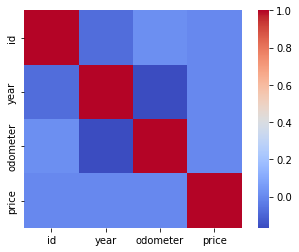

In [89]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

## Нормализация количественных признаков

Для нормализации количественных признаков приведём каждый такой признак к нулевому среднему и единичному среднеквадратичному отклонению

In [110]:
data_norm = data[['id', 'year', 'odometer', 'price']]
data_norm.describe()

,id,year,odometer,price
count,2.145200e+05,214520.000000,2.128500e+05,2.145200e+05
mean,7.311394e+09,2011.194075,9.306758e+04,4.418207e+04
std,4.457742e+06,9.581643,2.067273e+05,8.439546e+06
min,7.301583e+09,1900.000000,0.000000e+00,0.000000e+00
25%,7.307979e+09,2008.000000,3.117000e+04,6.950000e+03
50%,7.312415e+09,2013.000000,7.812100e+04,1.559000e+04
75%,7.315276e+09,2017.000000,1.305955e+05,2.790000e+04
max,7.317101e+09,2022.000000,1.000000e+07,3.736929e+09


In [114]:
data_stand = (data_norm - data_norm.mean(axis = 0))/data_norm.std(axis = 0)

data_norm.describe()

,id,year,odometer,price
count,2.145200e+05,214520.000000,2.128500e+05,2.145200e+05
mean,7.311394e+09,2011.194075,9.306758e+04,4.418207e+04
std,4.457742e+06,9.581643,2.067273e+05,8.439546e+06
min,7.301583e+09,1900.000000,0.000000e+00,0.000000e+00
25%,7.307979e+09,2008.000000,3.117000e+04,6.950000e+03
50%,7.312415e+09,2013.000000,7.812100e+04,1.559000e+04
75%,7.315276e+09,2017.000000,1.305955e+05,2.790000e+04
max,7.317101e+09,2022.000000,1.000000e+07,3.736929e+09


## Разбиение данных на обучающую и тестовую выборку

In [143]:
data['manufacturer'] = data['manufacturer'].astype('category')
data['manufacturer'].dtype

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


CategoricalDtype(categories=['acura', 'alfa-romeo', 'aston-martin', 'audi', 'bmw',
                  'buick', 'cadillac', 'chevrolet', 'chrysler', 'datsun',
                  'dodge', 'ferrari', 'fiat', 'ford', 'gmc', 'harley-davidson',
                  'honda', 'hyundai', 'infiniti', 'jaguar', 'jeep', 'kia',
                  'land rover', 'lexus', 'lincoln', 'mazda', 'mercedes-benz',
                  'mercury', 'mini', 'mitsubishi', 'morgan', 'nissan',
                  'pontiac', 'porsche', 'ram', 'rover', 'saturn', 'subaru',
                  'tesla', 'toyota', 'volkswagen', 'volvo'],
, ordered=False)

In [126]:
X = data.drop('type', axis = 1)
y = data['type']
feature_names = X.columns

In [127]:
feature_names

Index(['id', 'manufacturer', 'model', 'condition', 'title_status', 'year',
       'odometer', 'price'],
      dtype='object')

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X_train.shape, X_test.shape

((160890, 8), (53630, 8))

## Классификатор *k*-ближайших соседей